/blue/sarkar.sudeep/caio.dasilva/conda/envs/3dpc/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


frames_dir:  output/K23576/250m-m/frames
dir:  /home/caio.dasilva/datasets/brc2_rotate
file:  K23615_set2_wb0_10_45.rs-image-5.png
file:  K24570_set2_wb0_12_135.rs-image-5.png
file:  K23591_set1_wb0_4_135.rs-image-5.png
file:  K23616_set2_wb0_5_180.rs-image-5.png
file:  K25619_set2_wb0_3_90.rs-image-5.png
file:  K21568_set2_wb0_16_-45.rs-image-5.png
file:  K22578_set2_wb0_12_135.rs-image-5.png
file:  K20599_set1_wb0_16_-45.rs-image-5.png
file:  K21576_set2_wb0_13_180.rs-image-5.png
file:  K21562_set2_wb0_1_0.rs-image-5.png
file:  K22615_set1_wb0_16_-45.rs-image-5.png
file:  K21565_set1_wb0_12_135.rs-image-5.png
file:  K20568_set1_wb0_2_45.rs-image-5.png
file:  K22569_set1_wb0_8_-45.rs-image-5.png
file:  K24597_set2_wb0_9_0.rs-image-5.png
file:  K22609_set2_wb0_14_-135.rs-image-5.png
file:  K22591_set1_wb0_11_90.rs-image-5.png
file:  K24583_set1_wb0_16_-45.rs-image-5.png
file:  K22608_set1_wb0_3_90.rs-image-5.png
file:  K23593_set2_wb0_11_90.rs-image-5.png
file:  K25585_set2_wb0_15_-90.

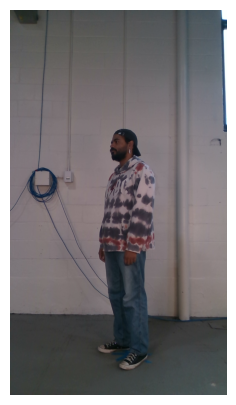

Cluster 0:


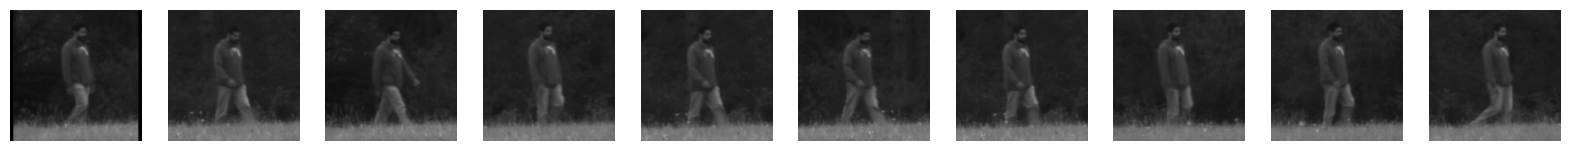

Cluster 1:


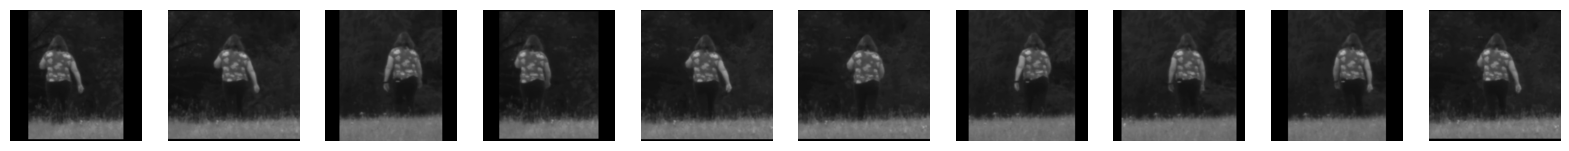

Cluster 2:


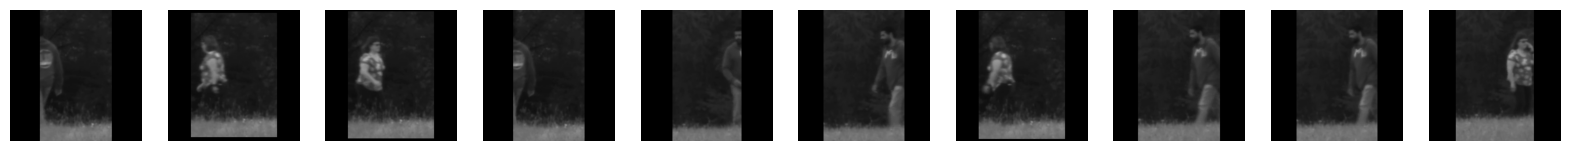

Cluster 3:


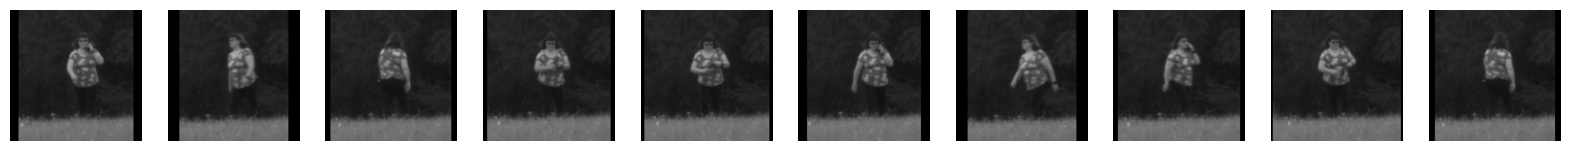

Cluster 4:


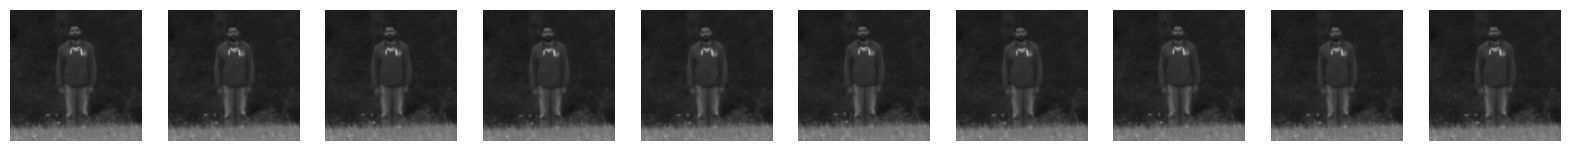

Cluster 5:


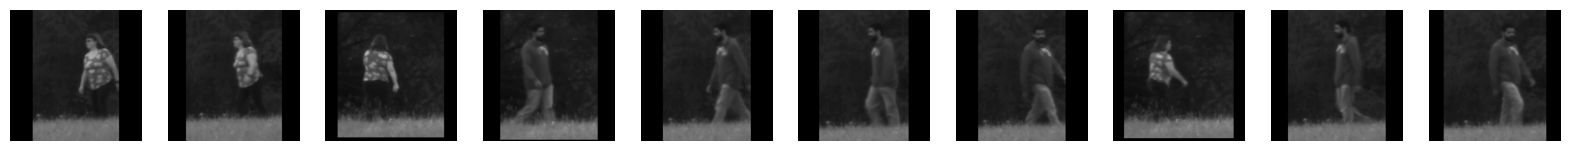

Cluster 6:


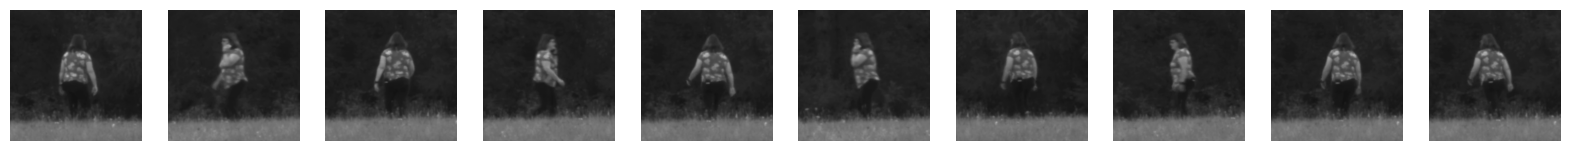

Cluster 7:


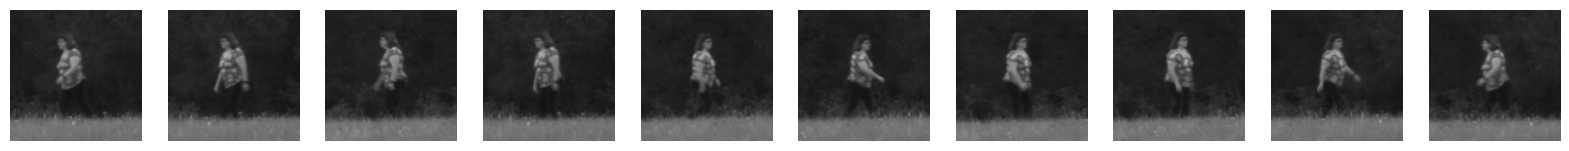

Cluster 8:


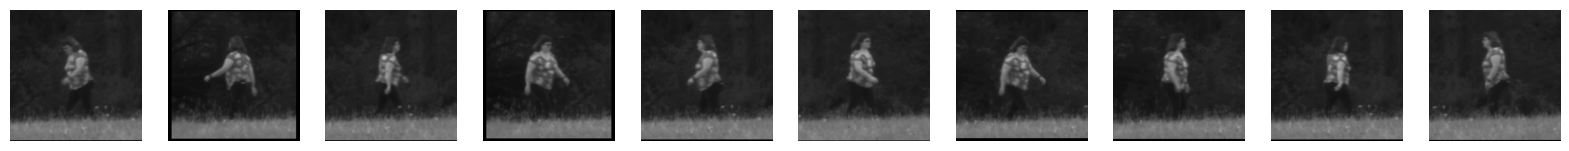

Cluster 9:


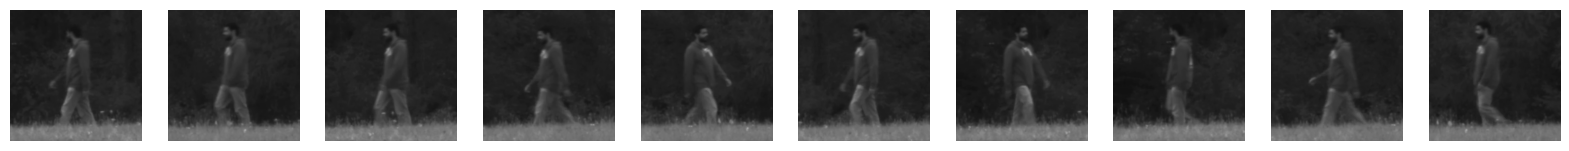

Enter the cluster IDs to remove (comma-separated):  1,3,5,6,7,8,2


Deleted output/K23576/250m-m/frames/frame_4315.png
Deleted output/K23576/250m-m/frames/frame_4258.png
Deleted output/K23576/250m-m/frames/frame_2737.png
Deleted output/K23576/250m-m/frames/frame_4358.png
Deleted output/K23576/250m-m/frames/frame_4231.png
Deleted output/K23576/250m-m/frames/frame_4191.png
Deleted output/K23576/250m-m/frames/frame_2741.png
Deleted output/K23576/250m-m/frames/frame_2751.png
Deleted output/K23576/250m-m/frames/frame_2723.png
Deleted output/K23576/250m-m/frames/frame_4199.png
Deleted output/K23576/250m-m/frames/frame_4298.png
Deleted output/K23576/250m-m/frames/frame_4251.png
Deleted output/K23576/250m-m/frames/frame_4245.png
Deleted output/K23576/250m-m/frames/frame_2733.png
Deleted output/K23576/250m-m/frames/frame_4211.png
Deleted output/K23576/250m-m/frames/frame_4267.png
Deleted output/K23576/250m-m/frames/frame_4299.png
Deleted output/K23576/250m-m/frames/frame_4240.png
Deleted output/K23576/250m-m/frames/frame_2729.png
Deleted output/K23576/250m-m/fr

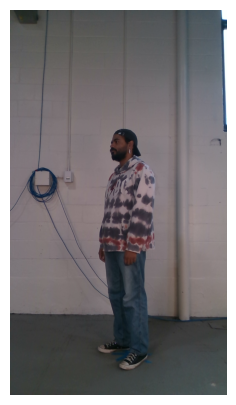

Cluster 0:


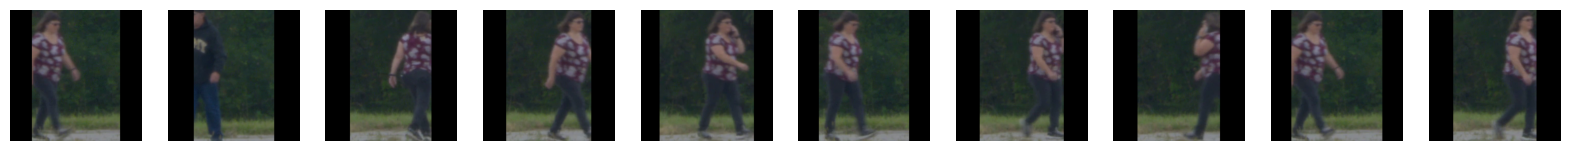

Cluster 1:


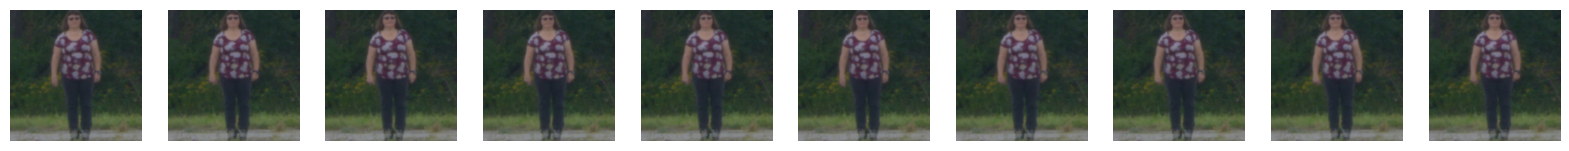

Cluster 2:


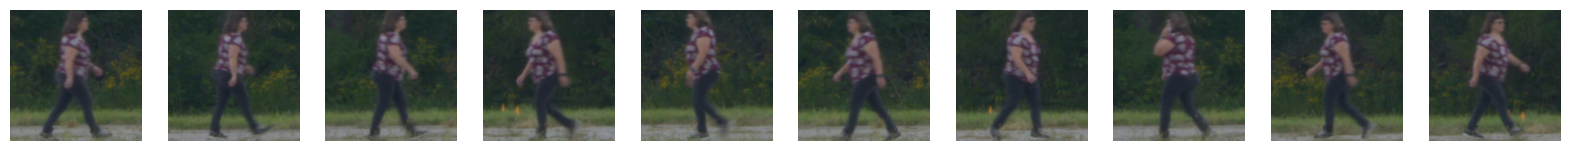

Cluster 3:


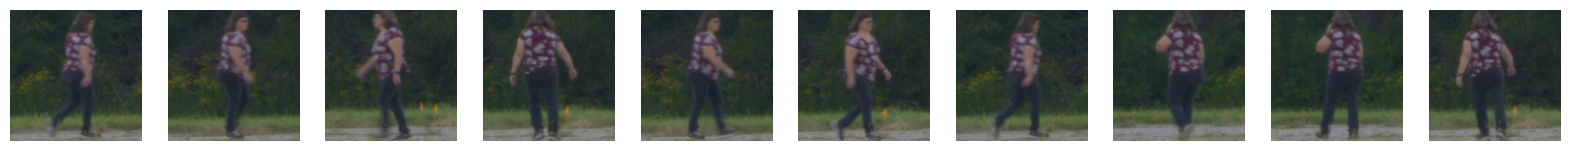

Cluster 4:


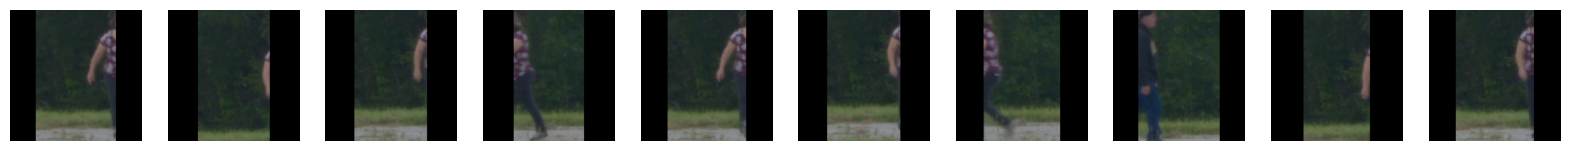

Cluster 5:


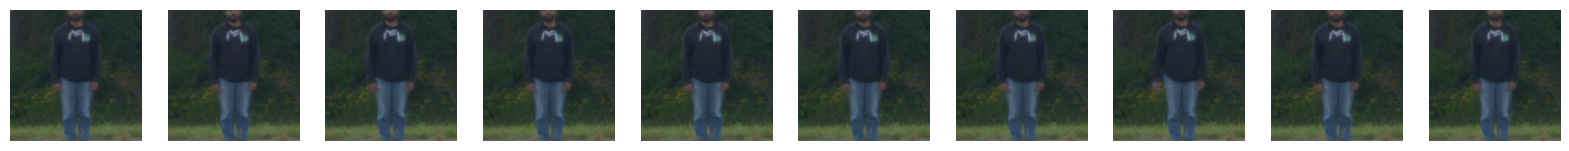

Cluster 6:


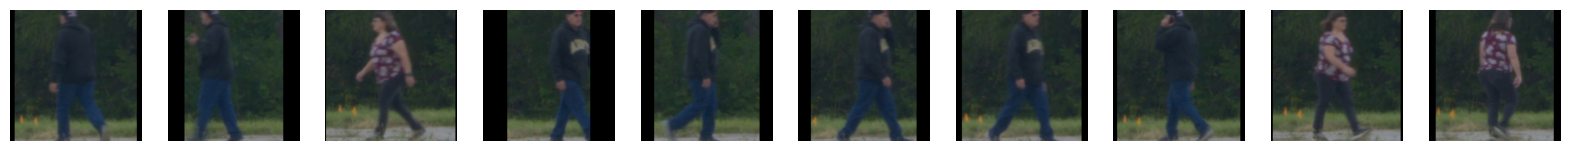

Cluster 7:


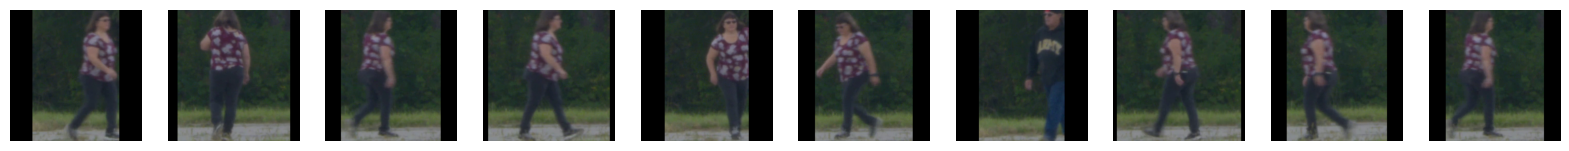

Cluster 8:


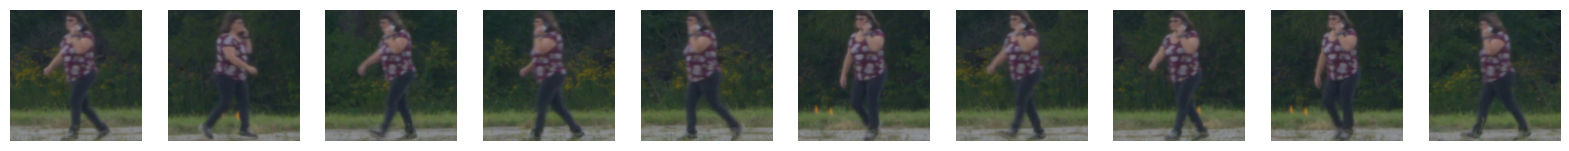

Cluster 9:


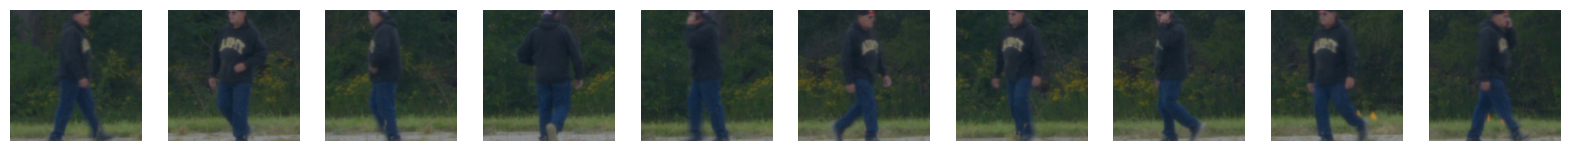

Enter the cluster IDs to remove (comma-separated):  0,1,2,3,4,5,6


Deleted output/K23576/250m-c/frames/frame_4728.png
Deleted output/K23576/250m-c/frames/frame_0272.png
Deleted output/K23576/250m-c/frames/frame_5983.png
Deleted output/K23576/250m-c/frames/frame_5723.png
Deleted output/K23576/250m-c/frames/frame_7896.png
Deleted output/K23576/250m-c/frames/frame_5560.png
Deleted output/K23576/250m-c/frames/frame_7901.png
Deleted output/K23576/250m-c/frames/frame_8135.png
Deleted output/K23576/250m-c/frames/frame_4729.png
Deleted output/K23576/250m-c/frames/frame_4899.png
Deleted output/K23576/250m-c/frames/frame_7158.png
Deleted output/K23576/250m-c/frames/frame_8290.png
Deleted output/K23576/250m-c/frames/frame_6258.png
Deleted output/K23576/250m-c/frames/frame_7140.png
Deleted output/K23576/250m-c/frames/frame_7316.png
Deleted output/K23576/250m-c/frames/frame_0271.png
Deleted output/K23576/250m-c/frames/frame_7731.png
Deleted output/K23576/250m-c/frames/frame_6262.png
Deleted output/K23576/250m-c/frames/frame_1670.png
Deleted output/K23576/250m-c/fr

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import json

# Load pre-trained ResNet50 model
model = resnet50(pretrained=True)
model = model.eval()
model = model.cuda()

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to extract features
def extract_features(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).cuda()
    with torch.no_grad():
        features = model(image).cpu().numpy()
    return features.flatten()

# and display an image with the same subjectID
def display_subject_image(subject_id, directory):
    print('dir: ', directory)
    for file in os.listdir(directory):
        print('file: ',file)
        if file.startswith(subject_id) and file.endswith('_set1_wb0_1_0.rs-image-5.png'):
            img_path = os.path.join(directory, file)
            img = Image.open(img_path)
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            return

# Function to process a frames directory
def process_frames_directory(frames_dir, root_dir, gt_dir):
    image_paths = [os.path.join(frames_dir, img) for img in os.listdir(frames_dir) if img.endswith('.png')]
    if not image_paths:
        return

    # Extract features for all images
    features = np.array([extract_features(img) for img in image_paths])

    # Perform K-means clustering
    num_clusters = 10  # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(features)

    # Assign images to clusters
    clusters = {i: [] for i in range(num_clusters)}
    for img_path, label in zip(image_paths, kmeans.labels_):
        clusters[label].append(img_path)
        
    # print('frames_dir: ', frames_dir)

    # Display an image with the same subjectID before showing clusters
    # subject_id = os.path.basename(image_paths[0]).split('_')[0]
    subject_id= frames_dir.split('/')[1]
    display_subject_image(subject_id, gt_dir)

    # Display images from each cluster
    for cluster_id, img_paths in clusters.items():
        print(f"Cluster {cluster_id}:")
        display_cluster_images(img_paths)

    # Ask user which clusters to remove
    clusters_to_remove = input("Enter the cluster IDs to remove (comma-separated): ")
    clusters_to_remove = [int(cid) for cid in clusters_to_remove.split(',')]

    # Delete images in the specified clusters
    for cluster_id in clusters_to_remove:
        for img_path in clusters[cluster_id]:
            os.remove(img_path)
            # print(f"Deleted {img_path}")

# Function to display images from a cluster
def display_cluster_images(image_paths, num_images=10):
    plt.figure(figsize=(20, 20))
    for i, img_path in enumerate(image_paths[:num_images]):
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Function to recursively find and process frames directories
def process_root_directory(root_dir, progress_file, gt_dir):
    # Load progress if it exists
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            processed_dirs = set(json.load(f))
    else:
        processed_dirs = set()

    for subdir, _, _ in os.walk(root_dir):
        frames_dir = os.path.join(subdir, 'frames')
        if os.path.exists(frames_dir) and subdir not in processed_dirs:
            process_frames_directory(frames_dir, root_dir, gt_dir)
            processed_dirs.add(subdir)
            # Save progress after processing each directory
            with open(progress_file, 'w') as f:
                json.dump(list(processed_dirs), f)

# Main function
def main():
    # root_dir = input("Enter the root directory: ")
    root_dir = 'output'
    # gt_dir = input("Enter the gt directory: ")
    gt_dir = '/home/caio.dasilva/datasets/brc2_rotate'
    progress_file = 'progress.json'
    process_root_directory(root_dir, progress_file, gt_dir)

if __name__ == "__main__":
    main()
